In [1]:
import geopandas as gpd

from shapely.ops import linemerge
from shapely.ops import split
from shapely import geometry

# %pip install git+https://github.com/ungarj/label_centerlines.git
from label_centerlines import get_centerline
import numpy as np

from scipy.ndimage import filters
#from shapely.geometry import LineString, MultiLineString, Point, MultiPoint

In [2]:
def smooth_linestring(linestring, smooth_sigma):
    """Use a gauss filter to smooth out the LineString coordinates."""
    return geometry.LineString(
        zip(
            np.array(filters.gaussian_filter1d(linestring.xy[0], smooth_sigma)),
            np.array(filters.gaussian_filter1d(linestring.xy[1], smooth_sigma))
        )
    )

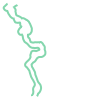

In [6]:
gdf = gpd.read_file(r"T:\2AK\Data2AbeKlaas\linestring.shp")

l_bank = linemerge(gdf.iloc[0:2].geometry.tolist())
r_bank = gdf.iloc[2].geometry
ls_banks = geometry.GeometryCollection([l_bank, r_bank])
ls_banks

In [8]:
from shapely.ops import linemerge

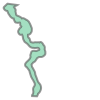

In [14]:
mls_banks = linemerge([r_bank, l_bank])
arr = np.vstack([np.array(bank.xy).T for bank in mls_banks])
polygon_banks = geometry.Polygon(arr)
polygon_banks

In [15]:
gamma = 75
smoothed_banks = geometry.MultiLineString([smooth_linestring(l_bank, gamma), smooth_linestring(r_bank, gamma)])

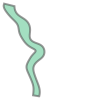

In [16]:
arr = np.vstack([np.array(bank.xy).T for bank in smoothed_banks])
polygon_smoothed_banks = geometry.Polygon(arr)
polygon_smoothed_banks

In [22]:
g1 = polygon_smoothed_banks.buffer(0.01).exterior

In [30]:
len(list(g1.coords))

5510

In [31]:
smooth_linestring(g1, gamma).coords)

5510

In [7]:
centerline = get_centerline(polygon_smoothed_banks, 0.5, 3000, 0.000005, 5)

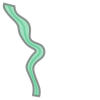

In [8]:
geometry.GeometryCollection([polygon_smoothed_banks, centerline])

In [9]:
# split in segments
parts = 10
splitter = geometry.MultiPoint([centerline.interpolate((i/parts), normalized=True) for i in range(1, parts)])
segments = split(centerline, splitter)

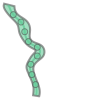

In [10]:
geometry.GeometryCollection([polygon_smoothed_banks, segments, splitter])